# CHURN PREDICTION PROJECT - MACHINE LEARNING!


# Project Overview


SyriaTel Communications is a Telecommunications company that is looking to predict and prevent customer churn. Customer churn is when a customer leaves/discontinues their service with SyriaTel. Customer churn is a major problem for many service-based companies because it is so expensive. Not only does the company lose the customer's monthly/yearly payment, but they also incur a customer acquisition cost to replace that customer. The project aims to analyze a telecommunications dataset to predict customer churn. The dataset contains information about customers' demographics, calling behavior, and service plans. The goal is to develop a predictive model that can accurately identify customers who are likely to churn, enabling the company to take proactive measures to retain them

# Business Problem

The telecommunications company is facing a significant issue of customer churn, where customers are discontinuing their services. This poses a threat to the company's revenue and market share. To address this problem, the company wants to leverage the available customer data and build a predictive model that can identify customers at a high risk of churn. By identifying these customers in advance, the company can implement targeted retention strategies to improve customer satisfaction and reduce churn rates.

# Data Used

The scope of this project involved analyzing the churn in telecoms dataset, which is available in the data folder and can be accessed on Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). The dataset consisted of 21 columns and a total of 3333 unique values. It was already preprocessed and considered relatively clean, without significant outliers or missing values.

# Deliverables

The project's final outcomes will consist of a predictive model specifically designed for customer churn prediction. Additionally, a comprehensive presentation will be prepared, highlighting the key discoveries made throughout the analysis and offering actionable recommendations for the company based on these findings.

## The flow of this notebook is as follows:

1. Loading and Previewing the dataset at hand
1. Data understanding and cleaning
2. Exploratory Data Analysis
3. Preprocessing
5. Modelling
6. Feature importance
7. Findings and Reccomendations
8. Conclusion


## Importing necessary libraries

In [108]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


## Load and preview the the data

In [109]:
df = pd.read_csv('tel_data.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Data understanding and cleaning

In [110]:
#checking for the column names of our data
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [111]:
#Checking for the shape of our data
df.shape


(3333, 21)

In [112]:
#Checking for overall datatypes of our columns and missing row values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [113]:
#confirming absense of  missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [114]:
#checking for duplicates
df.duplicated().sum()

0

### dropping columns
I drop the 'phone number' column because it contains unique values for each row, which might not be suitable for analysis or modeling purposes. Therefore, dropping this column helps to streamline the data and remove any unnecessary or uninformative features, improving the efficiency and effectiveness of subsequent data processing steps. The phone number does not provide information about customer behavior

In [115]:
df.drop(['phone number'], axis=1, inplace=True)

In [116]:
len(df['state'].unique())
#from Checking the data DC is included as the 51st state

51

### Checking for imbalance in the target variable 'churn'

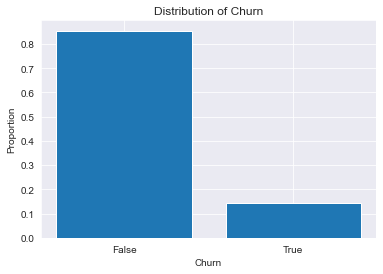

Class Counts:
False    2850
True      483
Name: churn, dtype: int64

Class Proportions:
False    0.855086
True     0.144914
Name: churn, dtype: float64


In [117]:
# Count the target classes
class_counts = df['churn'].value_counts()

# Calculate class proportions
class_proportions = class_counts / class_counts.sum()

# Visualize class distribution
plt.bar(class_proportions.index.astype(str), class_proportions.values)
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.title('Distribution of Churn')
plt.show()

# Print class counts and proportions
print('Class Counts:')
print(class_counts)
print('\nClass Proportions:')
print(class_proportions)



From the visuals and percentages above, There is definitely imbalance. It shall be sorted out in the modelling phase.

In [118]:
#description of the data in the dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



In the given code, the categorical and continuous columns are defined and assigned to two separate lists:

In [119]:

# categorical columns
cat_cols = [ 'international plan', 
                'voice mail plan', 
                'churn']
# continuous columns
cont_cols = ['number vmail messages', 
                'total day minutes', 
                'total day calls', 
                'total day charge',
                'total eve minutes',
                'total eve calls',
                'total eve charge',
                'total night minutes',
                'total night calls',
                'total night charge',
                'total intl minutes',
                'total intl calls',
                'total intl charge',
                'customer service calls']
     

### Plotting the columns with continuous variables

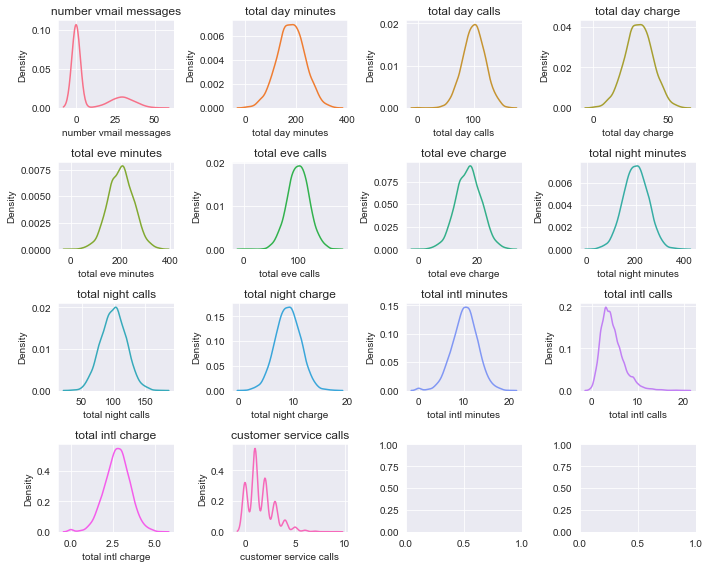

In [120]:

cols = cont_cols
nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
ax = ax.flatten()

color_palette = sns.color_palette("husl", len(cols))

for i, col in enumerate(cols):
    sns.kdeplot(df[col], ax=ax[i], color=color_palette[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.show()



All but three columns are normally distributed, the 'number vmail messages', 'total intl calls' and 'customer service calls' columns have data that is skewed to the right but with no major outliers so we shall keep them.

### Plotting the columns with categorical variables

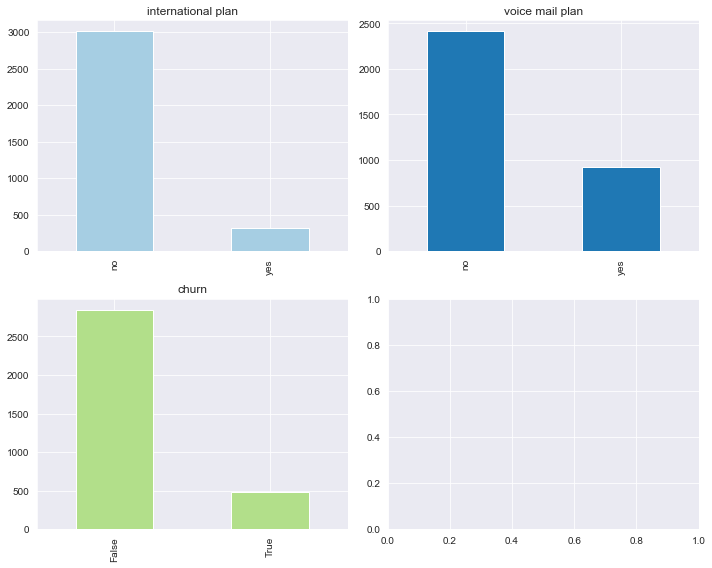

In [121]:
cols = cat_cols
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
ax = ax.flatten()

color_palette = sns.color_palette("Paired", len(cols))

for i, col in enumerate(cols):
    df[col].value_counts().plot(kind='bar', ax=ax[i], color=color_palette[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.show()


The plots above show imbalance in the categorical columns. 


# Exploratory Data Analysis(EDA)

### Churn Analysis with selected features

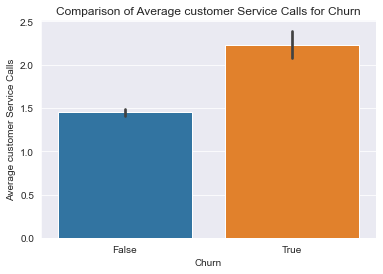

In [122]:
sns.barplot(x='churn', y='customer service calls', data=df)
plt.xlabel('Churn')
plt.ylabel('Average customer Service Calls')
plt.title('Comparison of Average customer Service Calls for Churn')
plt.show()


The plot above shows that a higher rate of customers who make calls to customer service actually churn

In [123]:
#function to calculate the churn rate
def get_churn_rate(array, include_retention=False):
    churns = sum(array)
    churn_rate = churns / len(array)
    if include_retention:
        return churn_rate, 1 - churn_rate
    else:
        return churn_rate


### Visualizing the relationship between number of calls made to customer servive and the churn rate.

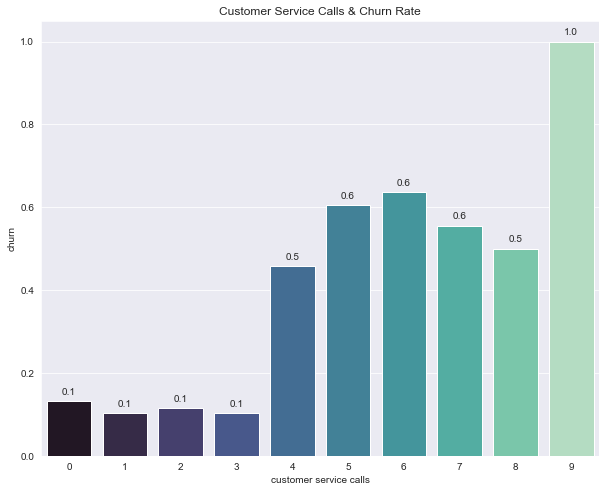

In [124]:
#visualizing the relationship between number of calls made to customer servive and the churn rate
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='customer service calls', y='churn',
                    data=df, palette='mako', ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Customer Service Calls & Churn Rate')
plt.show()

The above plot shows that the higher the number of calls made to customer service by a single client, the higher the churn rate of that client. seeems like there is really a problem with the customer service department that should be looked into. When we look at customer service calls, we can see that as the number of customer service calls increases, the likelihood of churning increases as well. Specifically, with at least 4 customer service calls, the likelihood of a customer churning increases from about 10% to 50%.

### Churn rate by state

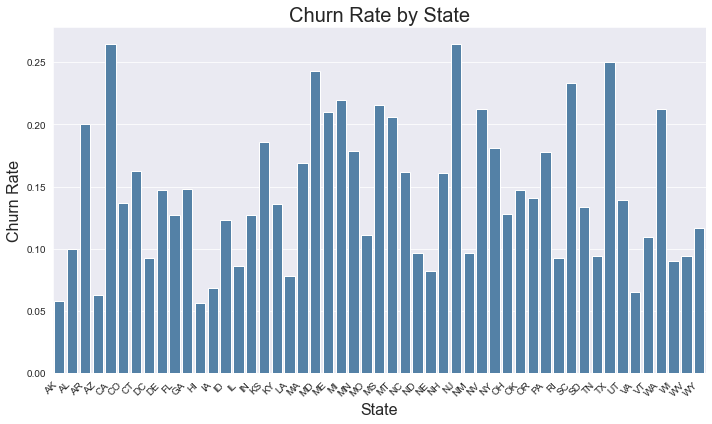

In [125]:
churn_by_state = df.groupby('state')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_state, x='state', y='churn', color='steelblue')
plt.xticks(rotation=45, ha='right')

plt.title('Churn Rate by State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Churn Rate', fontsize=16)

plt.tight_layout()
plt.show()


### Area code analysis

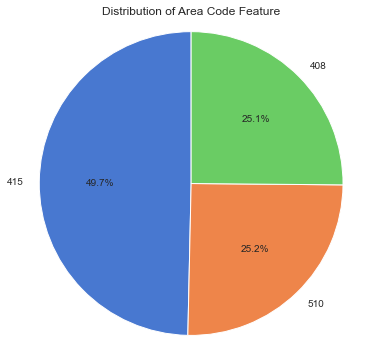

In [126]:
area = df['area code'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(area, labels=area.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Distribution of Area Code Feature')
plt.axis('equal') 
plt.show()


This shows that most clients in the included dataset come from Area code 415, with a percentage of 49.7. One fourth of customers have the area code 510 and another fourth have the area code 408.

### Correlation of continuous variables

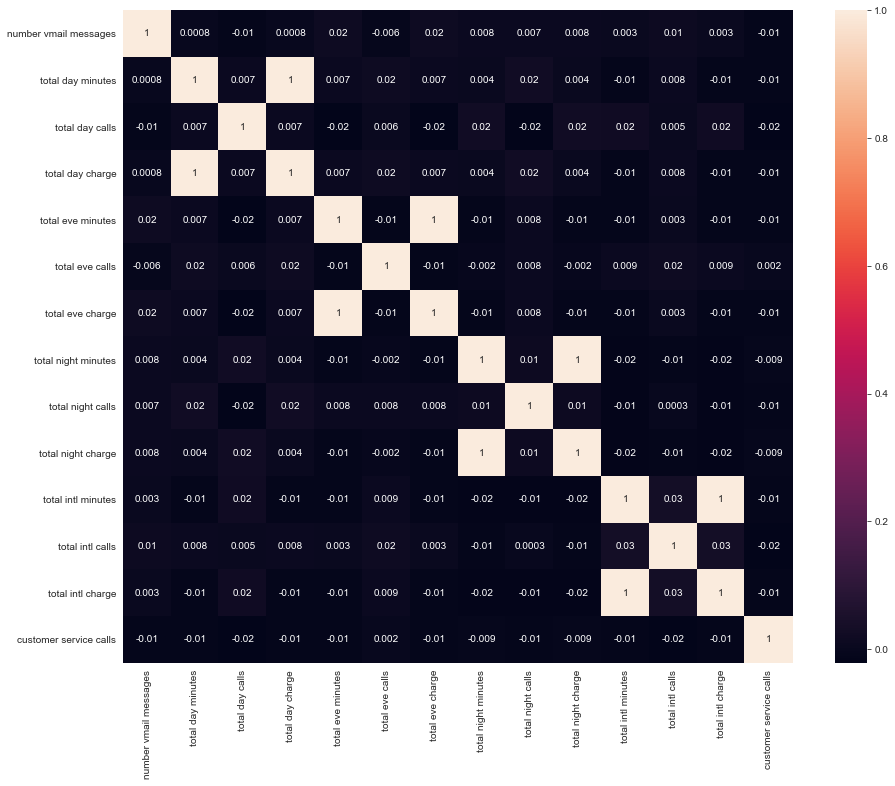

In [127]:
corr_mat = df[cont_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, fmt='.0g'); 
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the features are not correlated however some do share a perfect correlation.
Total day charge and total day minutes features are fully positively correlated.
Total eve charge and total eve minutes features are fully positively correlated.
Total night charge and total night minutes features are fully positively correlated.
Total int charge and total int minutes features are fully positively correlated.
It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

# Preprocessing

### Define X and y
As independent and predictor variables respectively

In [128]:

X = df.drop('churn', axis=1)
y = df['churn']


### Perform a  Train-Test Split
Splitting the dataset into training and testing as 75% training and 25% testing

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing - Encoding categorical features
Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [130]:
categorical_columns = ['international plan', 'voice mail plan', 'state']
ohe = OneHotEncoder(sparse=False, drop='first')

X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]), index=X_train.index)
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]), index=X_test.index)

### Dropping the original categorical columns from X_train and X_test
Dropping the categorical columns allows for the use of numerical features only, which is necessary for our algorithms that cannot directly handle categorical data.

In [131]:
X_train = X_train.drop(categorical_columns, axis=1)
X_test = X_test.drop(categorical_columns, axis=1)

### Normalizing numeric features
we use the StandardScaler method for standardizing numerical features by removing the mean and scaling to unit variance.
By performing feature scaling, the data is transformed to have a similar scale, which will be beneficial for our machine learning algorithms that are sensitive to the scale of the features. Scaling the data helps in avoiding biased results and improving the model's performance

In [132]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

### Concatenating the encoded categorical features with the normalized numeric features
I choose to perform concatenation of the scaled and encoded features into a single DataFrame for both the training and test datasets

In [133]:
X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

### Handling class imbalance with SMOTE
By using SMOTE, I am generating synthetic samples of the minority class to increase its representation in the training data. This helps in creating a more balanced training dataset, which can improve the performance of machine learning models, because I wam dealing with imbalanced classes

In [134]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Modelling

## 1. Logistic Regression - our baseline model
Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.
It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.
This method will be used to create a baseline model

Logistic Regression:
Accuracy: 0.7517985611510791
Precision: 0.3283582089552239
Recall: 0.7652173913043478
F1 Score: 0.45953002610966054


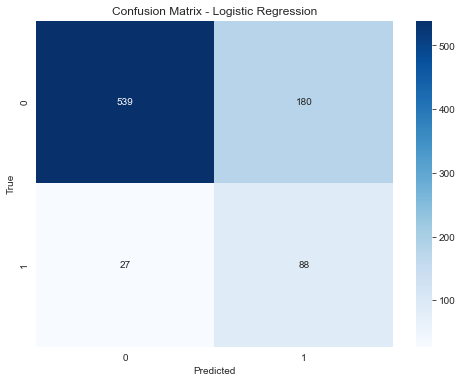

In [135]:
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Logistic Regression:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

our Logistic Model accuracy is 75.2%, which isn't bad. F1 score is only 46% which means the test will only be accurate less than half the times it is ran.

## 2. Decision Trees

A Decision Tree is a versatile supervised learning algorithm that can be applied to solve both classification and regression problems. However, it is particularly well-suited for addressing classification tasks. The algorithm constructs a tree-like structure, where the internal nodes correspond to the features present in the dataset, the branches represent decision rules based on those features, and each leaf node represents the final predicted outcome or class label.
Decision Trees are designed to mimic human decision-making processes, making them intuitive and easy to comprehend. The logic behind a decision tree can be readily understood due to its tree-like structure, which visually represents the sequence of decisions and their outcomes. This transparency allows users to interpret and explain the decision-making process effectively, making decision trees a popular choice for interpretability and transparency in machine learning models.

Decision Tree:
Accuracy: 0.8896882494004796
Precision: 0.5751633986928104
Recall: 0.7652173913043478
F1 Score: 0.6567164179104478


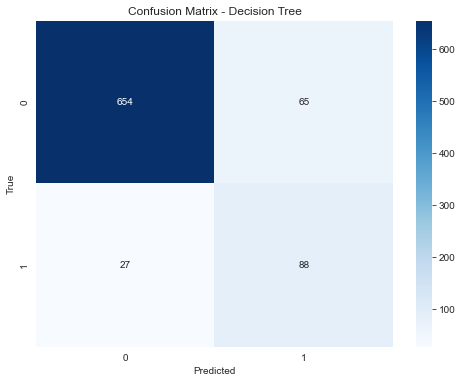

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
y_pred = dt.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Decision Tree:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


From the metrics provided, our model predicted the correct class for approximately 89% of the instances in the dataset. The F1 score has a significant improvement to 65.7% from the Logistic regression model above with an an f1 score of 46%.

## 3. Random Forest

Random forest is an ensemble machine learning algorithm that consists of multiple trees. The strength of a forest is often associated with the number of trees it contains. In random forests, decision trees are built using randomly selected data samples. Each tree provides a prediction, and the final solution is determined through a voting process. Random forests also offer a useful measure of feature importance.

In machine learning, hyperparameter optimization or tuning refers to the task of selecting the optimal values for the hyperparameters of a learning algorithm. Hyperparameters are parameters that control the learning process, while other parameters, such as node weights, are learned from the data.

Random Forest:
Accuracy: 0.9436450839328537
Precision: 0.788135593220339
Recall: 0.808695652173913
F1 Score: 0.7982832618025751


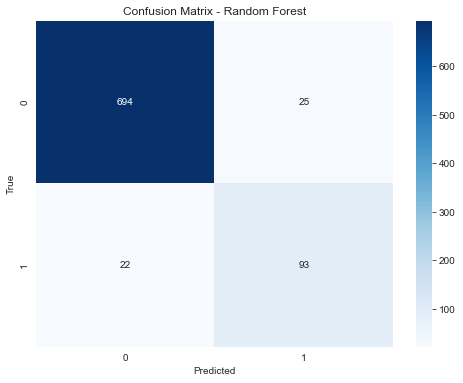

In [137]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Random Forest:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

From the metrics above, our random forest model has by far much higher accuracy(94.4%) and f1 score(79.8%) as compared to our baseline model and decision trees model. this is our best model.

# Evaluation

### Plotting ROC to compare the three models

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) of a classifier. A classifier with excellent performance will exhibit a curve that closely follows the upper-left corner of the graph. In the case of the random forest classifier, it often demonstrates this favorable behavior.

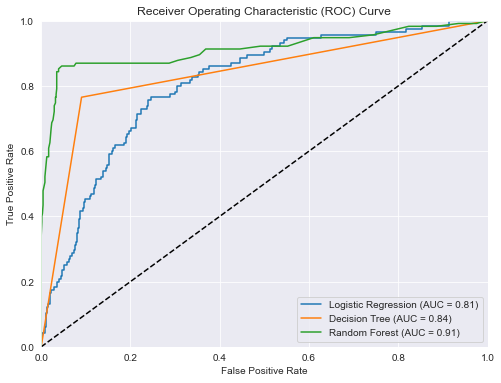

In [138]:
# Logistic Regression
logreg_proba = logreg.predict_proba(X_test_processed)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_proba)
logreg_auc = roc_auc_score(y_test, logreg_proba)

# Decision Tree
dt_proba = dt.predict_proba(X_test_processed)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
dt_auc = roc_auc_score(y_test, dt_proba)

# Random Forest
rf_proba = rf.predict_proba(X_test_processed)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = roc_auc_score(y_test, rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [139]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9655152485841191


with tuning of the Random Forest algorithm, these parameters were found to achieve the highest performance score of 0.9652807819956077. It suggests that the model trained with these parameter settings is likely to provide better predictions compared to other combinations of hyperparameters tested during the tuning process. The absence of a specific value for 'max_depth' indicates that the decision trees in the random forest can grow until all leaves are pure or until they reach the minimum sample size.

# Feature Importance (all features)
The code below hwlps us rank the feature importance in the results of our best model in descending order.

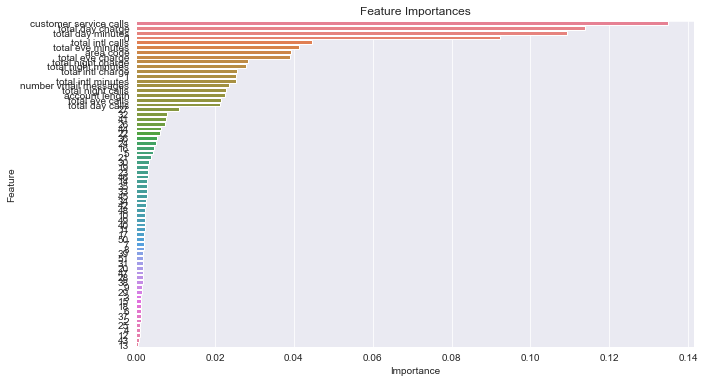

In [140]:
# Retrieve feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_names = X_train_processed.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

colors = sns.color_palette('husl', len(importances))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette = colors)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Feature Importance (Top 5 features)

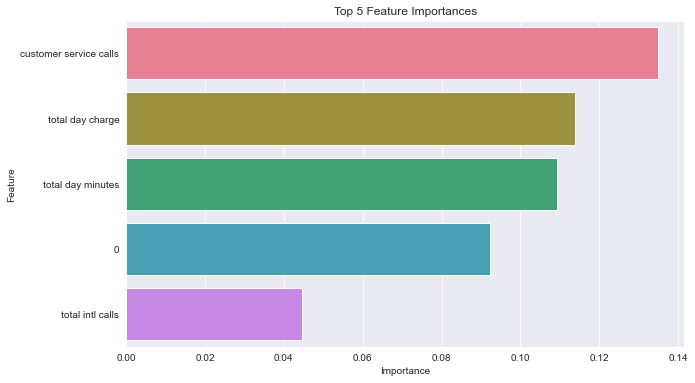

In [141]:
# Retrieve feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_names = X_train_processed.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select top 5 important features
top_features = feature_importances.head(5)


colors = sns.color_palette('husl', len(top_features))

# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette=colors)
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



# Findings and Reccomendations

Based on the feature importance plot, it has been determined that customer service calls, total day charge, and total day minutes are the most influential factors contributing to customer churn. This indicates that the telecommunication company should prioritize efforts to enhance customer satisfaction through improved customer service experiences, enhancements in service offerings, and the implementation of strategies to reduce day-time charges.

Furthermore, it is crucial for the telco to monitor and analyze the number of customer service calls, as a high volume of such calls can be indicative of customer dissatisfaction. This information can be leveraged to design targeted retention and engagement programs that aim to mitigate churn and enhance overall customer satisfaction.

By focusing on these insights and taking proactive measures, the telecommunication company can strategically address the identified pain points, thereby reducing customer churn, improving customer retention, and fostering higher levels of customer satisfaction.

# Conclusion

The analysis of customer churn offers valuable insights to the telecom company, providing actionable strategies to mitigate churn effectively. By implementing the recommended approaches, the company can enhance customer retention rates, leading to improved financial performance. However, it is important to note that further research and analysis are necessary to enhance the accuracy of the predictive model and fine-tune the recommendations for even better outcomes.

# Next Steps

1. Occasional re-evaluation and checking of the models performance
2. Gather more data in states with high churn rate
3. Considering feedback and insights from domain experts, stakeholders, or end-users of the model
4. Gather more data on cell signals both locally and international calls
5. Audit customer service department